In [80]:
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

df_zillow = pd.read_csv("df_zillow.csv")



In [2]:
df_zillow

,dateSold,propertyType,address,priceChange,zestimate,price,bedrooms,longitude,latitude,listingStatus,zpid,rentZestimate,bathrooms,country
0,Not Sold,SINGLE_FAMILY,"159 E 71st St, New York, NY 10021",0.0,8829054,8950000,7,-73.962140,40.769753,FOR_SALE,31535244,26576,6,USA
1,Not Sold,SINGLE_FAMILY,"132 E 62nd St, New York, NY 10065",-500000.0,18280175,18500000,5,-73.967400,40.764107,FOR_SALE,31534396,63306,7,USA
2,Not Sold,SINGLE_FAMILY,"10 E 64th St, New York, NY 10065",0.0,26028888,26500000,5,-73.970150,40.766903,FOR_SALE,31533428,89186,6,USA
3,Not Sold,SINGLE_FAMILY,"161 E 63rd St, New York, NY 10065",0.0,9798995,10000000,6,-73.965320,40.764538,FOR_SALE,2133383159,29792,8,USA
4,Not Sold,SINGLE_FAMILY,"248 W 71st St, New York, NY 10023",0.0,25907142,26000000,6,-73.984100,40.778515,FOR_SALE,31521996,49530,9,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Not Sold,SINGLE_FAMILY,"17644 Kildare Rd, Jamaica, NY 11432",0.0,2022170,2189000,4,-73.788980,40.722090,FOR_SALE,32080378,4792,3,USA
59,Not Sold,SINGLE_FAMILY,"99-24 Russell Street, Hamilton Beach, NY 11414",0.0,341400,299000,2,-73.831490,40.654213,FOR_SALE,32218173,2278,1,USA
60,Not Sold,SINGLE_FAMILY,"116-17 126th Street, South Ozone Park, NY 11420",0.0,555800,575000,3,-73.812070,40.676548,FOR_SALE,2058112236,2874,2,USA
61,Not Sold,SINGLE_FAMILY,"110-42 207th Street, Queens Village, NY 11429",-15000.0,641700,635000,3,-73.749954,40.706200,FOR_SALE,32156286,3058,2,USA


In [3]:
type(df_zillow["priceChange"][1])

numpy.float64

In [4]:
Y_value = []
for i in range(63):
    if df_zillow["price"][i] <= np.median(df_zillow["price"]):
        Y_value.append(0)
    else:
        Y_value.append(1)
        
Y_value

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [5]:
df_zillow["Y"] = Y_value
df_zillow

,dateSold,propertyType,address,priceChange,zestimate,price,bedrooms,longitude,latitude,listingStatus,zpid,rentZestimate,bathrooms,country,Y
0,Not Sold,SINGLE_FAMILY,"159 E 71st St, New York, NY 10021",0.0,8829054,8950000,7,-73.962140,40.769753,FOR_SALE,31535244,26576,6,USA,1
1,Not Sold,SINGLE_FAMILY,"132 E 62nd St, New York, NY 10065",-500000.0,18280175,18500000,5,-73.967400,40.764107,FOR_SALE,31534396,63306,7,USA,1
2,Not Sold,SINGLE_FAMILY,"10 E 64th St, New York, NY 10065",0.0,26028888,26500000,5,-73.970150,40.766903,FOR_SALE,31533428,89186,6,USA,1
3,Not Sold,SINGLE_FAMILY,"161 E 63rd St, New York, NY 10065",0.0,9798995,10000000,6,-73.965320,40.764538,FOR_SALE,2133383159,29792,8,USA,1
4,Not Sold,SINGLE_FAMILY,"248 W 71st St, New York, NY 10023",0.0,25907142,26000000,6,-73.984100,40.778515,FOR_SALE,31521996,49530,9,USA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Not Sold,SINGLE_FAMILY,"17644 Kildare Rd, Jamaica, NY 11432",0.0,2022170,2189000,4,-73.788980,40.722090,FOR_SALE,32080378,4792,3,USA,0
59,Not Sold,SINGLE_FAMILY,"99-24 Russell Street, Hamilton Beach, NY 11414",0.0,341400,299000,2,-73.831490,40.654213,FOR_SALE,32218173,2278,1,USA,0
60,Not Sold,SINGLE_FAMILY,"116-17 126th Street, South Ozone Park, NY 11420",0.0,555800,575000,3,-73.812070,40.676548,FOR_SALE,2058112236,2874,2,USA,0
61,Not Sold,SINGLE_FAMILY,"110-42 207th Street, Queens Village, NY 11429",-15000.0,641700,635000,3,-73.749954,40.706200,FOR_SALE,32156286,3058,2,USA,0


In [6]:
lat_range = max(df_zillow["latitude"]) - min(df_zillow["latitude"])
lon_range = max(df_zillow["longitude"]) - min(df_zillow["longitude"])

a_lat = min(df_zillow["latitude"])
a_lon = min(df_zillow["longitude"])

lat_scale = []
lon_scale = []

for i in range(63):
    lat_scale.append((df_zillow["latitude"][i] - a_lat) / lat_range)
    lon_scale.append((df_zillow["longitude"][i] - a_lon) / lon_range)

df_zillow["latScale"] = lat_scale
df_zillow["lonScale"] = lon_scale

df_zillow_svm = df_zillow[["latScale", "lonScale", "Y"]]

In [7]:
df_zillow_train, df_zillow_test = train_test_split(df_zillow_svm, test_size=0.2)

X_train = df_zillow_train[["latScale", "lonScale"]]
Y_train = df_zillow_train["Y"]
X_test = df_zillow_test[["latScale", "lonScale"]]
Y_test = df_zillow_test["Y"]

In [86]:
cls1 = svm.SVC(kernel = "linear")
clf1 = cls1.fit(X_train, Y_train)
pred1 = cls1.predict(X_test)
print(pred1, Y_test)
matrix1 = metrics.confusion_matrix(Y_test, pred1)
print(matrix1)

cls2 = svm.SVC(kernel = "poly", degree = 6)
clf2 = cls2.fit(X_train, Y_train)
pred2 = cls2.predict(X_test)
print(pred2, Y_test)
matrix2 = metrics.confusion_matrix(Y_test, pred2)
print(matrix2)

cls3 = svm.SVC(kernel = "rbf", gamma = 0.12)
clf3 = cls3.fit(X_train, Y_train)
pred3 = cls3.predict(X_test)
print(pred3, Y_test)
matrix3 = metrics.confusion_matrix(Y_test, pred3)
print(matrix3)

[0 1 1 0 0 1 1 1 0 0 1 1 1] 31    0
23    1
24    1
40    0
35    0
19    1
26    1
13    1
42    1
48    0
25    1
4     1
9     1
Name: Y, dtype: int64
[[4 0]
 [1 8]]
[0 1 1 0 0 1 0 1 0 0 1 1 1] 31    0
23    1
24    1
40    0
35    0
19    1
26    1
13    1
42    1
48    0
25    1
4     1
9     1
Name: Y, dtype: int64
[[4 0]
 [2 7]]
[0 1 1 0 0 1 1 1 0 0 1 1 1] 31    0
23    1
24    1
40    0
35    0
19    1
26    1
13    1
42    1
48    0
25    1
4     1
9     1
Name: Y, dtype: int64
[[4 0]
 [1 8]]


In [71]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


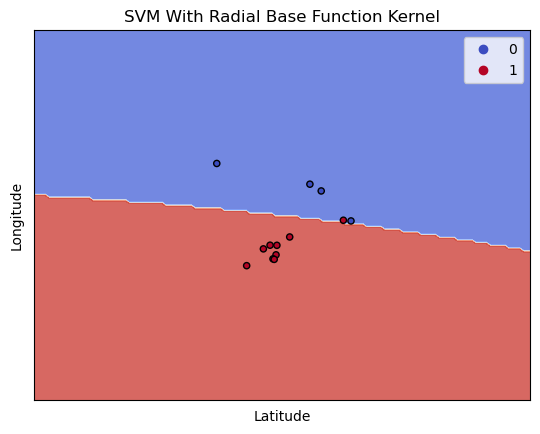

In [78]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig, ax3 = plt.subplots()
# title for the plots
title1 = ('SVM With Linear Kernel')
title2 = ('SVM With Polynomial Kernel')
title3 = ('SVM With Radial Base Function Kernel')
X0, X1 = X_test["latScale"], X_test["lonScale"]
xx, yy = make_meshgrid(X0, X1)


plot_contours(ax1, clf1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plot_contours(ax2, clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plot_contours(ax3, clf3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
scatter1 = ax1.scatter(X0, X1, c=Y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax1.set_ylabel('Longitude')
ax1.set_xlabel('Latitude')
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title(title1)
ax1.legend(*scatter1.legend_elements(), loc = "upper right")
scatter2 = ax2.scatter(X0, X1, c=Y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax2.set_ylabel('Longitude')
ax2.set_xlabel('Latitude')
ax2.set_xticks(())
ax2.set_yticks(())
ax2.set_title(title2)
ax2.legend(*scatter2.legend_elements(), loc = "upper right")
scatter3 = ax3.scatter(X0, X1, c=Y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax3.set_ylabel('Longitude')
ax3.set_xlabel('Latitude')
ax3.set_xticks(())
ax3.set_yticks(())
ax3.set_title(title3)
ax3.legend(*scatter3.legend_elements(), loc = "upper right")
plt.show()
